# Understanding RESTful APIs

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## GET

In [2]:
api_url = "https://jsonplaceholder.typicode.com/todos/1"
response = requests.get(api_url)
response.json()

{'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}

In [3]:
pd.DataFrame(response.json(), index=[0])

,userId,id,title,completed
0,1,1,delectus aut autem,False


## POST

In [4]:
api_url = "https://jsonplaceholder.typicode.com/todos"
todo = {"userId": 1, "title": "Buy milk", "completed": False}
response = requests.post(api_url, json=todo)
response.json()

{'userId': 1, 'title': 'Buy milk', 'completed': False, 'id': 201}

In [5]:
response.status_code

201

## PUT

In [6]:
api_url = "https://jsonplaceholder.typicode.com/todos/10"
response = requests.get(api_url)
response.json()

{'userId': 1,
 'id': 10,
 'title': 'illo est ratione doloremque quia maiores aut',
 'completed': True}

In [7]:
todo = {"userId": 1, "title": "Wash car", "completed": True}
response = requests.put(api_url, json=todo)
response.json()

{'userId': 1, 'title': 'Wash car', 'completed': True, 'id': 10}

In [8]:
response.status_code

200

## PATCH

In [9]:
api_url = "https://jsonplaceholder.typicode.com/todos/10"
todo = {"title": "Mow lawn"}
response = requests.patch(api_url, json=todo)
response.json()

{'userId': 1, 'id': 10, 'title': 'Mow lawn', 'completed': True}

In [10]:
response.status_code

200

## Extras

In [11]:
users_list = ["jameshtwose", "GLicitra", "deSagaz", 
            "heinonmatti", "henkenai", "almerlucke",
             "natlachaman", "a-hoey", "gerriekevdw",
             "WoltersEric"]
all_users_df = pd.DataFrame()
for user in users_list:
    api_url = f"https://api.github.com/users/{user}"
    response = requests.get(api_url)
    user_df = pd.DataFrame(response.json(), index=[0])
    all_users_df = pd.concat([all_users_df, user_df])
_ = all_users_df.reset_index(drop=True, inplace=True)    

In [12]:
all_users_df.head(2)

,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,...,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,jameshtwose,39407392,MDQ6VXNlcjM5NDA3Mzky,https://avatars.githubusercontent.com/u/394073...,,https://api.github.com/users/jameshtwose,https://github.com/jameshtwose,https://api.github.com/users/jameshtwose/follo...,https://api.github.com/users/jameshtwose/follo...,https://api.github.com/users/jameshtwose/gists...,...,None,None,None,None,12,0,3,2,2018-05-18T11:57:15Z,2021-07-31T08:10:12Z
1,GLicitra,74935245,MDQ6VXNlcjc0OTM1MjQ1,https://avatars.githubusercontent.com/u/749352...,,https://api.github.com/users/GLicitra,https://github.com/GLicitra,https://api.github.com/users/GLicitra/followers,https://api.github.com/users/GLicitra/followin...,https://api.github.com/users/GLicitra/gists{/g...,...,None,None,None,None,0,9,0,1,2020-11-23T21:43:04Z,2021-07-05T17:36:20Z


In [13]:
all_users_df = all_users_df.assign(created_at = lambda d: pd.to_datetime(d["created_at"]))

In [14]:
all_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   login                10 non-null     object             
 1   id                   10 non-null     int64              
 2   node_id              10 non-null     object             
 3   avatar_url           10 non-null     object             
 4   gravatar_id          10 non-null     object             
 5   url                  10 non-null     object             
 6   html_url             10 non-null     object             
 7   followers_url        10 non-null     object             
 8   following_url        10 non-null     object             
 9   gists_url            10 non-null     object             
 10  starred_url          10 non-null     object             
 11  subscriptions_url    10 non-null     object             
 12  organizations_url    10 n

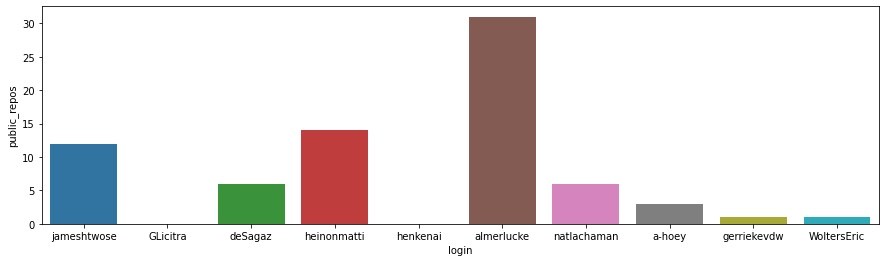

In [15]:
_ = plt.figure(figsize=(15,4))
_ = sns.barplot(data=all_users_df,
               x="login",
               y="public_repos")

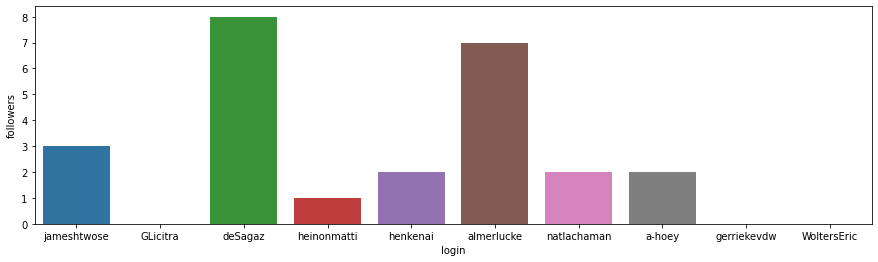

In [16]:
_ = plt.figure(figsize=(15,4))
_ = sns.barplot(data=all_users_df,
               x="login",
               y="followers")

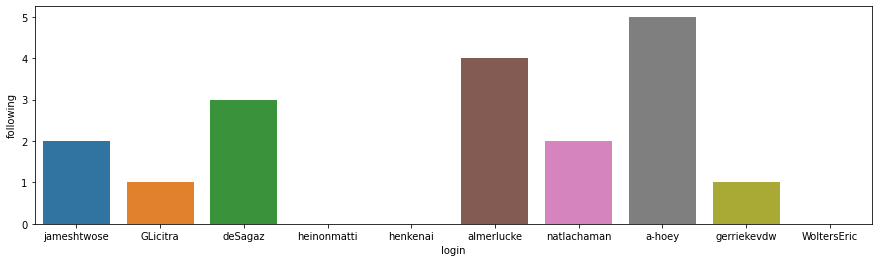

In [17]:
_ = plt.figure(figsize=(15,4))
_ = sns.barplot(data=all_users_df,
               x="login",
               y="following")

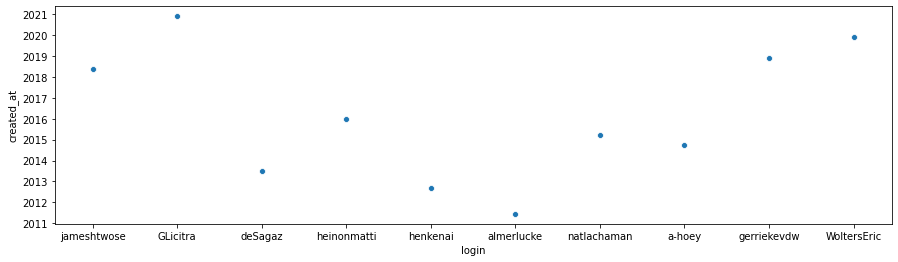

In [18]:
_ = plt.figure(figsize=(15,4))
_ = sns.scatterplot(data=all_users_df,
               x="login",
               y="created_at")